In [1]:
from finlab.data import Data
import datetime
data = Data()
data.date = datetime.date(2019,12,27)

# 計算股價淨值比 Price/Book Ratio（pb）

In [2]:
# 先利用 data 取出需要的值
price = data.get('收盤價', 300)
股東權益 = data.get('歸屬於母公司業主之權益合計', 1)
股本 = data.get('普通股股本', 1)


# 股價淨值比 = 股價 / 每股淨值
# 每股淨值 = 股東權益 / 流通股數
# 流通股數 = 股本 / 10

流通股數 = 股本 / 10
每股淨值 = 股東權益 / 流通股數
今日股價 = price.iloc[-1]

股價淨值比pb = 今日股價 / 每股淨值
股價淨值比pb

stock_id,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.652232,0.553637,1.266133,NaN,NaN,NaN,1.104658,3.502005,NaN,NaN


# 將股價淨值比 包裝成 function 直接使用

In [3]:
def 股價淨值比(n):
    
    股東權益 = data.get('歸屬於母公司業主之權益合計', n)
    股本 = data.get('普通股股本', n)
    price = data.get('收盤價', 100*n)
    
    # 算法跟剛剛非常類似，只是寫得比較快，不用往下深究啦XD，
    # 首先上面的公式，可以變成 股價淨值比 = 股價 / (股東權益/股本)/10
    # 然後因為 price 的頻率跟 股本 不一樣，所以必須
    return price.reindex(股本.index, method='ffill')/(股東權益/股本)/10

股價淨值比pb = 股價淨值比(4)
股價淨值比pb.head()

stock_id,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.64656,0.589002,1.198011,NaN,NaN,NaN,1.039329,3.521433,NaN,NaN


(0, 5)

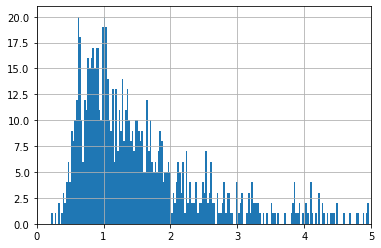

In [4]:
# 畫圖的起手式
import matplotlib.pyplot as plt
%matplotlib inline

# 找出最後一筆股價淨值比（第一條row）
起始股價淨值比pb = 股價淨值比pb.iloc[0]

# 畫出 histogram 分佈圖 （股價為x的股票有幾檔？）。設定 bins=1000 可以讓分佈圖切的更精細
# 調整 bins 為 2000 和 500 看看有什麼不一樣
起始股價淨值比pb.hist(bins=1000)

plt.xlim(0,5)

# X軸為股價淨值比，Y軸為股票的數量

In [5]:
import pandas as pd



結束股價 = price.iloc[-1] # 最後一筆股價
起始股價 = price.loc[股價淨值比pb.index[0]] # 淨值比公佈當天

起始股價淨值比 = 股價淨值比pb.iloc[0]

獲利 = (結束股價/起始股價 - 1) * 100

print('買入股價淨值比小於0.5的股票，與其獲利(%)：')
獲利[起始股價淨值比 < 0.5]

買入股價淨值比小於0.5的股票，與其獲利(%)：


stock_id
1314     1.936799
1337     4.251701
1340     7.371795
1806     3.658537
2038     3.253182
2201     1.842105
2380     8.947368
2409    31.647211
2443    30.651341
2611    -4.438280
2841     5.895954
3015     7.635468
3481    25.299401
3703    -2.592593
4930    -2.222222
4960     3.878116
5608    -4.857820
6116    27.201258
8110    21.495327
8411     7.876712
8429     0.000000
8488    -0.588235
dtype: float64

In [6]:
# 條件
condition = (起始股價淨值比 < 0.5)

# 選出符合條件的股票
stocks = condition[condition].index

# 印出股票和其股價
stocks_price = price[stocks]
stocks_price.head()

stock_id,1314,1337,1340,1806,2038,2201,2380,2409,2443,2611,...,3481,3703,4930,4960,5608,6116,8110,8411,8429,8488
date,,,,,,,,,,,,,,,,,,,,,
2018-10-08,13.55,7.68,26.80,7.63,9.95,20.70,5.00,12.40,5.68,7.20,...,10.20,13.95,11.75,9.10,7.81,7.27,11.70,13.55,18.90,19.75
2018-10-09,13.65,7.59,26.50,7.71,9.85,20.90,5.01,12.50,5.79,7.26,...,10.10,14.00,11.65,8.37,7.85,7.20,11.55,13.40,18.65,19.50
2018-10-11,12.55,6.84,23.85,7.00,8.87,19.65,4.51,11.30,5.24,6.54,...,9.11,13.20,11.00,7.54,7.45,6.61,10.40,12.60,16.80,19.30
2018-10-12,12.90,6.80,23.35,6.94,9.00,19.60,4.41,11.85,5.20,6.66,...,9.67,13.60,10.95,7.50,7.53,7.00,10.80,12.70,16.80,18.35
2018-10-15,12.75,6.80,22.60,6.95,9.01,19.50,4.43,11.70,5.20,6.58,...,9.45,13.60,11.10,7.48,8.00,7.00,10.75,12.45,16.95,18.25


# 持有一段時間 簡易回測

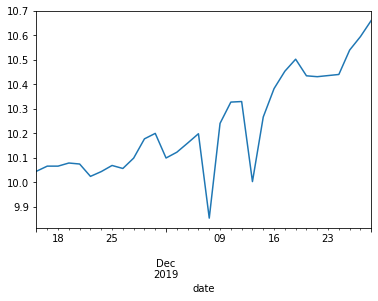

In [7]:
# 設定起始時間：我們看到 股價淨值比 的當下
start_time = 股價淨值比pb.index[0]

# 設定結束時間：我們股價最後一筆
end_time = price.index[-1]

# 將 stocks_price 的股價，選出時間段（start_time ~ end_time），將每天股票平均，並畫出來，當作是買入一籃子股票（類似於每檔買一張）
stocks_price.loc[start_time:end_time].mean(axis=1).plot()

# 跟上面一樣，但是將資產平均分散買入
#stock_price = stocks_price.loc[start_time:end_time]
#(stock_price/stock_price.iloc[0]).mean(axis=1).plot()